In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

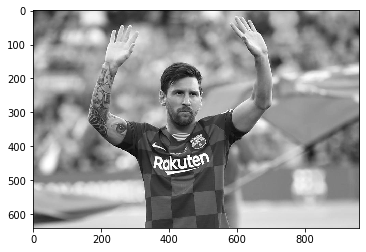

In [2]:
img = cv2.imread('/Users/sonudileep/Documents/images/messi.jpg',0)
img=img.astype(np.double)
img = img/255

plt.imshow(img,cmap='gray')
plt.show()

In [3]:
def im2col(img,block_size): # to divide the image into blocks
    image_block = []
    block_height = block_size[1]
    block_width = block_size[0]
    block_size = block_height * block_width
    for j in range(0, img.shape[1], block_height):
        for i in range(0, img.shape[0], block_width):
            image_block.append(np.reshape(img[i:i+block_width, j:j+block_height], block_size))
    image_block = np.asarray(image_block).astype(float)
    return image_block

def col2im(mtx, image_size, block_size): # to combine the blocks back into image
    p, q = block_size
    sx = image_size[1]
    sy = image_size[0]
    result = np.zeros(image_size)  
    col = 0
    for j in range(0,sx,q):
         for i in range(0,sy,p):
             result[i:i+q, j:j+p] = mtx[col].reshape(8,8)
             col += 1
    return result 

In [4]:
block_height = 8
block_width = 8
block_size = block_width*block_height
n = im2col(img,(block_width,block_height))

In [5]:
#Applying KL algorithm
mean = np.mean(n,0) # calculate the mean of the block
image = np.transpose(n) - mean.reshape((block_size,1)) # make it zero mean
covariance = np.cov(image) # find the covariance matrix

w,v = np.linalg.eig(np.transpose(covariance)) # Finding eigen vectors of covariance matrix
idx = w.argsort()[::-1] # Sort the eigen vector matrix from highest to lowest
w = w[idx]
v = v[:,idx]
y = np.matmul(np.transpose(v),image); #

In [6]:
n = 10 # Eigen vectors upto n will be used for storing the entire image
y[n:block_size,:] = np.zeros((block_size-n,y.shape[1])); # make the last block_size-n eigen vectors zero.

In [7]:
z2 = np.matmul(np.linalg.inv(np.transpose(v)),y); # For restoring the image from 
x2 = z2 + mean.reshape((block_size,1)); # Add the mean for plotting

In [8]:
img_comp = col2im(np.transpose(x2),(img.shape[0],img.shape[1]),(block_width,block_height)) # compressed image
cv2.imwrite('/Users/sonudileep/Documents/images/original.jpg',img*255)
cv2.imwrite('/Users/sonudileep/Documents/images/compressed.jpg',img_comp*255) # img_comp *255 for setting the 
                                                                                # pixel range back to 0 to 255.    

True

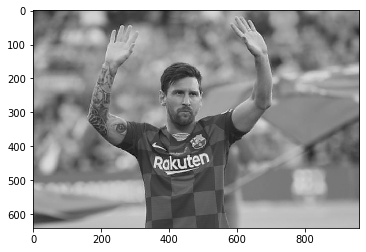

In [9]:
plt.imshow(img_comp,cmap='gray') #reconstruction from only 10 eigen vectors
plt.show()